# ***Linear Regression***
###### **Def:** Linear Regression is a statistical technique used to predict a continuous outcome variable by finding the best-fit straight line through a set of data point.

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import csv file

In [2]:
df = pd.read_csv('salary.csv', sep = ';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [3]:
new_df = df.drop('Date', axis = 'columns')
new_df

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


Visualization

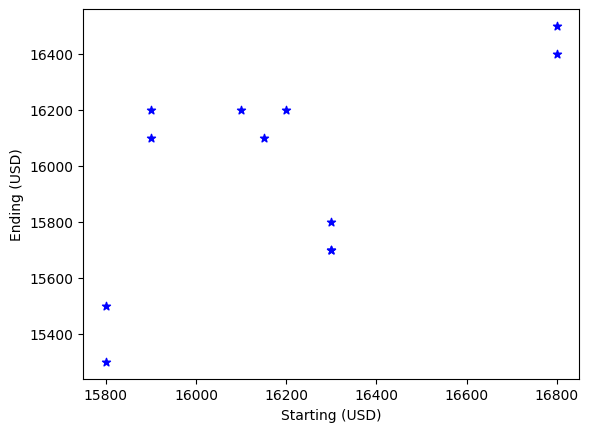

In [4]:
%matplotlib inline
plt.xlabel('Starting (USD)')
plt.ylabel("Ending (USD)")
plt.scatter(df['Starting (USD)'], df['Ending (USD)'], color = 'blue', marker = '*')

In [5]:
x = new_df[['Starting (USD)']]
x

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300
5,16800
6,15900
7,15800
8,16150
9,16300


In [6]:
y = new_df[['Ending (USD)']]
y

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700
5,16400
6,16200
7,15500
8,16100
9,15800


Import ML model

In [7]:
from sklearn import linear_model

In [8]:
# Linear regression object

reg = linear_model.LinearRegression()

In [9]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [10]:
y.mean()

Ending (USD)    15975.0
dtype: float64

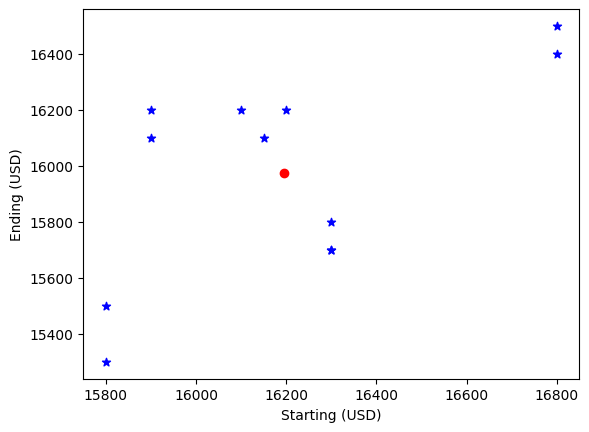

In [11]:
plt.scatter(x.mean(), y.mean(), color = 'red', marker = 'o')
plt.xlabel('Starting (USD)')
plt.ylabel("Ending (USD)")
plt.scatter(df['Starting (USD)'], df['Ending (USD)'], color = 'blue', marker = '*')

In [12]:
reg.fit(x, y)

LinearRegression()

In [13]:
# Coefficient
m = reg.coef_
m

array([[0.65258293]])

In [14]:
# Y intercept
c = reg.intercept_
c

array([5405.87555702])

In [15]:
m * 16500 + c

array([[16173.4939759]])

Prediction

In [16]:
reg.predict([[16500]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16173.4939759]])

### *Visualization with best-fit line*

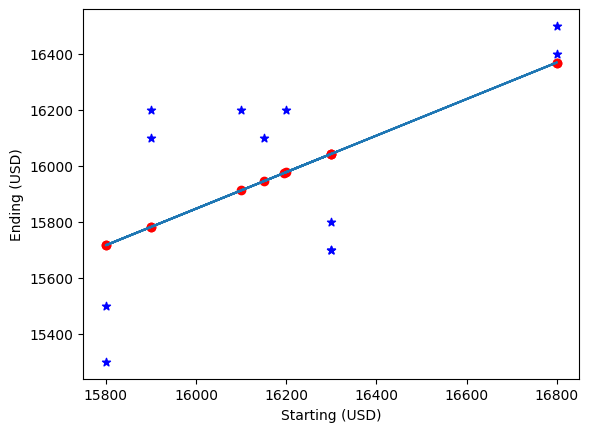

In [17]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color = 'red', marker = 'o')
plt.xlabel('Starting (USD)')
plt.ylabel("Ending (USD)")
plt.scatter(df['Starting (USD)'], df['Ending (USD)'], color = 'blue', marker = '*')
plt.scatter(df['Starting (USD)'], reg.predict(x), color = 'red', marker = 'o')

In [18]:
reg.predict([[16800]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16369.26885625]])

# ***Loss and Cost Function***

*Loss = actual_y - preducted_y*

*Cost = average of loss function*

Cost Function:
1. MAE(Mean Absolute Error)
2. MSE(Mean Square Error)

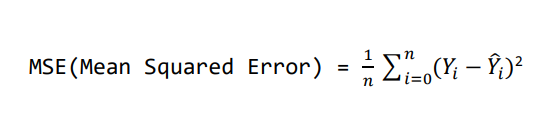





In [19]:
df['predicted_y'] = reg.predict(x)
df

,Date,Starting (USD),Ending (USD),predicted_y
0,01.01.24,16800,16500,16369.268856
1,01.12.23,15900,16100,15781.944215
2,01.11.23,15800,15300,15716.685922
3,01.10.23,16100,16200,15912.460802
4,01.09.23,16300,15700,16042.977389
5,01.08.23,16800,16400,16369.268856
6,01.07.23,15900,16200,15781.944215
7,01.06.23,15800,15500,15716.685922
8,01.05.23,16150,16100,15945.089949
9,01.04.23,16300,15800,16042.977389


Calculate loss

In [20]:
df['Loss'] = df['Ending (USD)'] - df['predicted_y']
df

,Date,Starting (USD),Ending (USD),predicted_y,Loss
0,01.01.24,16800,16500,16369.268856,130.731144
1,01.12.23,15900,16100,15781.944215,318.055785
2,01.11.23,15800,15300,15716.685922,-416.685922
3,01.10.23,16100,16200,15912.460802,287.539198
4,01.09.23,16300,15700,16042.977389,-342.977389
5,01.08.23,16800,16400,16369.268856,30.731144
6,01.07.23,15900,16200,15781.944215,418.055785
7,01.06.23,15800,15500,15716.685922,-216.685922
8,01.05.23,16150,16100,15945.089949,154.910051
9,01.04.23,16300,15800,16042.977389,-242.977389


In [21]:
# MSE
from sklearn.metrics import mean_squared_error

In [22]:
# Calculate Mean Square Error
mse = mean_squared_error(df['Ending (USD)'], df['predicted_y'])
mse

80411.23397700385

## *Performance / Accuracy*

i. using score() function

use x and y

In [23]:
reg.score(x, y)

0.3577804940272571

ii. using R-Squared Method(use actua_y and predicted_y)

Value of R-Squared range [0, 1]

Formula:

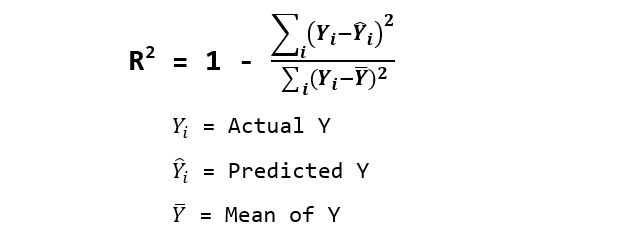


In [24]:
# Calculating R-squared

from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.3577804940272571